In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

print("Deliveries shape:", deliveries_df.shape)
print("Matches shape:", matches_df.shape)

deliveries = deliveries_df.copy()
matches = matches_df.copy()

Deliveries shape: (260920, 17)
Matches shape: (1095, 20)


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [ ]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


**DATA** **CLEANING**

In [ ]:
# Drop rows with missing values in the 'winner' column
matches = matches.dropna(subset=['winner'])


In [ ]:
# Inpute missing valuse in 'player_of_match'
matches['player_of_match'] = matches['player_of_match'].fillna('Unknown') # we fill something in the empty place

In [ ]:
# Drop unwanted columns from the dataset
matches.drop(['id', 'city', 'method'], axis=1, inplace=True)

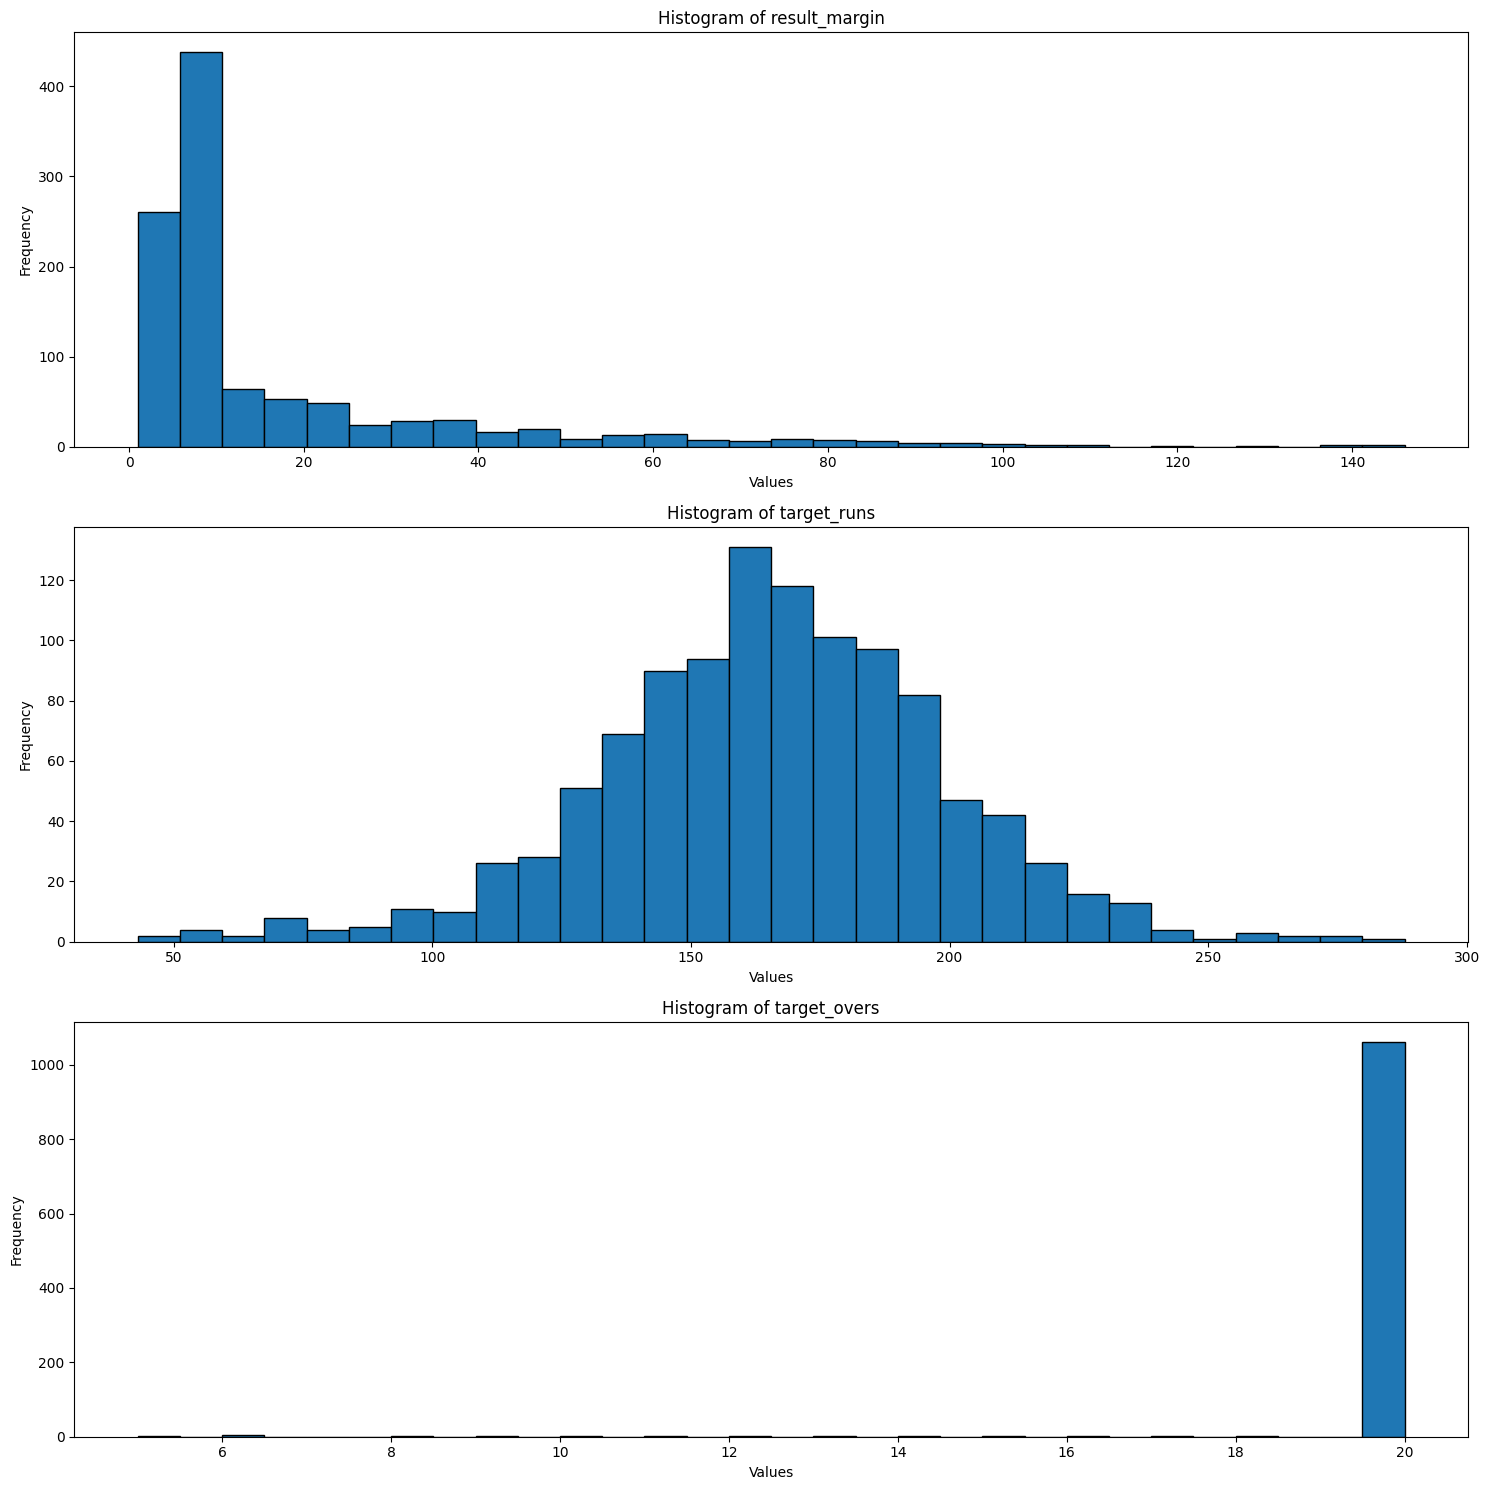

In [ ]:
import matplotlib.pyplot as plt

# List of columns to plot histograms for
columns_to_handle_missing = ['result_margin', 'target_runs', 'target_overs']

# Define the number of subplots based on the number of columns
num_columns = len(columns_to_handle_missing)

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_columns))  # Adjust the size as needed

# Plot a histogram for each column
for i, column in enumerate(columns_to_handle_missing):
    plt.subplot(num_columns, 1, i + 1)  # Create a subplot for each column
    plt.hist(matches[column].dropna(), bins=30, edgecolor='black')  # Drop NaN values and plot histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Input selected columns with median because they have outliers

matches['result_margin'] = matches['result_margin'].fillna(matches['result_margin'].median())
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].median())
matches['target_overs'] = matches['target_overs'].fillna(matches['target_overs'].median())

In [ ]:
matches.nunique()

,0
season,17
date,821
match_type,8
player_of_match,291
venue,58
...,...
target_runs,169
target_overs,15
super_over,2
umpire1,62


 **Feature Engineering**

In [ ]:
# Extract date features
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['day'] = matches['date'].dt.day

# Drop the original date column
matches.drop('date', axis=1, inplace=True)

In [ ]:
# Function to split season values
def split_season(season):
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20' + end) if len(end) == 2 else int(end)
    else:
        start = end = int(season)
    return start, end

# Apply the function to create new columns
matches[['season_start', 'season_end']] = matches['season'].apply(lambda x: pd.Series(split_season(x)))

# Convert to datetime and extract year
matches['season_start'] = pd.to_datetime(matches['season_start'], format='%Y').dt.year
matches['season_end'] = pd.to_datetime(matches['season_end'], format='%Y').dt.year

# Drop the original 'season' column
# matches.drop('season', axis=1, inplace=True)

In [ ]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in the 'winner' column
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   match_type       1090 non-null   object 
 2   player_of_match  1090 non-null   object 
 3   venue            1090 non-null   object 
 4   team1            1090 non-null   object 
 5   team2            1090 non-null   object 
 6   toss_winner      1090 non-null   object 
 7   toss_decision    1090 non-null   object 
 8   winner           1090 non-null   object 
 9   result           1090 non-null   object 
 10  result_margin    1090 non-null   float64
 11  target_runs      1090 non-null   float64
 12  target_overs     1090 non-null   float64
 13  super_over       1090 non-null   object 
 14  umpire1          1090 non-null   object 
 15  umpire2          1090 non-null   object 
 16  year             1090 non-null   int32  
 17  month            10

**Feature Extraction from the matches datase**

In [ ]:
matches.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


In [ ]:
teams = pd.concat([matches['team1'], matches['team2']]).unique()
team_stats = pd.DataFrame(teams, columns=['team_name'])

team_stats

,team_name
0,Royal Challengers Bangalore
1,Punjab Kings
2,Delhi Capitals
3,Mumbai Indians
4,Kolkata Knight Riders
...,...
7,Chennai Super Kings
8,Kochi Tuskers Kerala
9,Pune Warriors
10,Gujarat Titans


In [ ]:
# Calculate matches played and won
team_stats['matches_played'] = team_stats['team_name'].apply(lambda x: len(matches[(matches['team1'] == x) | (matches['team2'] == x)]))
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: len(matches[matches['winner'] == x]))
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,252,123,48.809524
1,Punjab Kings,246,112,45.528455
2,Delhi Capitals,250,115,46.000000
3,Mumbai Indians,261,144,55.172414
4,Kolkata Knight Riders,251,131,52.191235
...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848
8,Kochi Tuskers Kerala,14,6,42.857143
9,Pune Warriors,75,27,36.000000
10,Gujarat Titans,75,41,54.666667


In [ ]:
team_stats['total_runs_scored'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_runs'].sum() + matches[matches['team2'] == x]['target_runs'].sum())
team_stats['total_wickets_taken'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_overs'].sum() + matches[matches['team2'] == x]['target_overs'].sum())

team_stats['total_runs_scored'] = team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken'] = team_stats['total_wickets_taken'].astype(int)

team_stats


,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975
1,Punjab Kings,246,112,45.528455,41178,4854
2,Delhi Capitals,250,115,46.000000,41234,4920
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Kolkata Knight Riders,251,131,52.191235,40557,4907
...,...,...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848,39503,4693
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277
9,Pune Warriors,75,27,36.000000,11514,1471
10,Gujarat Titans,75,41,54.666667,12942,1495


In [ ]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['batting_team'] == x]['total_runs'].sum() /
 (deliveries[deliveries['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['bowling_team'] == x]['total_runs'].sum() /
 (deliveries[deliveries['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011
...,...,...,...,...,...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307
10,Gujarat Titans,75,41,54.666667,12942,1495,172.560000,8.471423,8.460668


In [ ]:
# Exclude no-result matches from deliveries
no_result_match_ids = [501265, 829763, 829813, 1178424, 1359519]
filtered_deliveries = deliveries[~deliveries['match_id'].isin(no_result_match_ids)]

# Highest and lowest scores excluding no-result matches
highest_scores = filtered_deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].max())
team_stats['lowest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].min())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48
...,...,...,...,...,...,...,...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99
10,Gujarat Titans,75,41,54.666667,12942,1495,172.560000,8.471423,8.460668,233,89


In [ ]:
# Total 4s and 6s
team_stats['total_4s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 4)].shape[0])
team_stats['total_6s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 6)].shape[0])

# Average Powerplay and Death overs scores
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries[(deliveries['over'] > 15)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score'] = team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team'] == x]['total_runs'].mean())
team_stats['average_death_overs_score'] = team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team'] == x]['total_runs'].mean())

team_stats


,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55,3196,1509,53.295359,39.741228
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74,170,53,54.928571,30.636364
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99,525,196,47.577778,30.909091
10,Gujarat Titans,75,41,54.666667,12942,1495,172.560000,8.471423,8.460668,233,89,691,271,55.644444,41.431818


Feature extraction from the deliveries **dataset**

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
# Add 'balls_faced'
batgroup = deliveries.groupby(['batter'])
batsman_stats = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball': 'balls_faced'})


# Set option to display all rows
pd.set_option('display.max_rows', 10)

# Now display the DataFrame
batsman_stats


,balls_faced
batter,
A Chopra,75
A Choudhary,20
A Dananjaya,5
A Flintoff,57
A Kamboj,2
...,...
Yashpal Singh,67
Younis Khan,7
Yudhvir Singh,16


In [ ]:
# Add 'innings'
batsman_stats['innings'] = batgroup['inning'].nunique()

# Set option to display all rows
pd.set_option('display.max_rows', 10)
batsman_stats


,balls_faced,innings
batter,,
A Chopra,75,2
A Choudhary,20,2
A Dananjaya,5,1
A Flintoff,57,2
A Kamboj,2,1
...,...,...
Yashpal Singh,67,2
Younis Khan,7,1
Yudhvir Singh,16,2


In [ ]:
# Add 'runs'
batsman_stats['runs'] = batgroup['batsman_runs'].sum()

# Set option to display all rows
pd.set_option('display.max_rows', 10)
batsman_stats

,balls_faced,innings,runs
batter,,,
A Chopra,75,2,53
A Choudhary,20,2,25
A Dananjaya,5,1,4
A Flintoff,57,2,62
A Kamboj,2,1,2
...,...,...,...
Yashpal Singh,67,2,47
Younis Khan,7,1,3
Yudhvir Singh,16,2,22


Feature extraction from the deliveries dataset

In [ ]:
# Add '0s'
batsman_stats['0s'] = deliveries[deliveries['batsman_runs'] == 0].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'0s': 0}, inplace=True)
batsman_stats['0s'] = batsman_stats['0s'].astype(int)

batsman_stats['1s'] = deliveries[deliveries['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'1s': 0}, inplace=True)
batsman_stats['1s'] = batsman_stats['1s'].astype(int)

batsman_stats['2s'] = deliveries[deliveries['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'2s': 0}, inplace=True)
batsman_stats['2s'] = batsman_stats['2s'].astype(int)

batsman_stats['3s'] = deliveries[deliveries['batsman_runs'] == 3].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'3s': 0}, inplace=True)
batsman_stats['3s'] = batsman_stats['3s'].astype(int)

batsman_stats['4s'] = deliveries[deliveries['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'4s': 0}, inplace=True)
batsman_stats['4s'] = batsman_stats['4s'].astype(int)

batsman_stats['6s'] = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'6s': 0}, inplace=True)
batsman_stats['6s'] = batsman_stats['6s'].astype(int)


# Set option to display all rows
pd.set_option('display.max_rows', 10)

batsman_stats

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Chopra,75,2,53,45,21,2,0,7,0
A Choudhary,20,2,25,4,13,1,0,1,1
A Dananjaya,5,1,4,2,2,1,0,0,0
A Flintoff,57,2,62,24,23,2,1,5,2
A Kamboj,2,1,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Yashpal Singh,67,2,47,39,20,2,1,5,0
Younis Khan,7,1,3,4,3,0,0,0,0
Yudhvir Singh,16,2,22,8,4,1,0,1,2


In [ ]:
# Add 'highest_score'
batsman_stats['highest_score'] = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max()

# Set option to display all rows
pd.set_option('display.max_rows', 10)

batsman_stats


,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score
batter,,,,,,,,,,
A Chopra,75,2,53,45,21,2,0,7,0,24
A Choudhary,20,2,25,4,13,1,0,1,1,15
A Dananjaya,5,1,4,2,2,1,0,0,0,4
A Flintoff,57,2,62,24,23,2,1,5,2,24
A Kamboj,2,1,2,0,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,67,2,47,39,20,2,1,5,0,20
Younis Khan,7,1,3,4,3,0,0,0,0,3
Yudhvir Singh,16,2,22,8,4,1,0,1,2,14


In [ ]:
# Add 'player_out'
batsman_stats['player_out'] = batgroup['is_wicket'].count()
batsman_stats.head()

batsman_stats['player_out'] = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count()
batsman_stats.fillna({'player_out': 0}, inplace=True) # there might be not-out matches
batsman_stats['player_out'] = batsman_stats['player_out'].astype(int)

# Set option to display all rows
pd.set_option('display.max_rows', 10)

batsman_stats

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out
batter,,,,,,,,,,,
A Chopra,75,2,53,45,21,2,0,7,0,24,5
A Choudhary,20,2,25,4,13,1,0,1,1,15,2
A Dananjaya,5,1,4,2,2,1,0,0,0,4,0
A Flintoff,57,2,62,24,23,2,1,5,2,24,2
A Kamboj,2,1,2,0,2,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,67,2,47,39,20,2,1,5,0,20,4
Younis Khan,7,1,3,4,3,0,0,0,0,3,1
Yudhvir Singh,16,2,22,8,4,1,0,1,2,14,4


In [ ]:
# Add 'batting_avg'
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0, axis=1)

# Add 'batting_strike_rate'
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced']
                                                           > 0 else 0, axis=1)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
batsman_stats

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out,batting_avg,batting_strike_rate
batter,,,,,,,,,,,,,
A Chopra,75,2,53,45,21,2,0,7,0,24,5,10.60,70.67
A Choudhary,20,2,25,4,13,1,0,1,1,15,2,12.50,125.00
A Dananjaya,5,1,4,2,2,1,0,0,0,4,0,0.00,80.00
A Flintoff,57,2,62,24,23,2,1,5,2,24,2,31.00,108.77
A Kamboj,2,1,2,0,2,0,0,0,0,2,0,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,67,2,47,39,20,2,1,5,0,20,4,11.75,70.15
Younis Khan,7,1,3,4,3,0,0,0,0,3,1,3.00,42.86
Yudhvir Singh,16,2,22,8,4,1,0,1,2,14,4,5.50,137.50


In [ ]:
# Add 'balls_throw'
bowlgroup = deliveries.groupby(['bowler'])
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})

# Set option to display all rows
pd.set_option('display.max_rows', 10)
bowler_stats


,balls_throw
bowler,
A Choudhary,108
A Dananjaya,25
A Flintoff,66
A Kamboj,68
A Kumble,983
...,...
Yash Dayal,615
Yash Thakur,432
Yudhvir Singh,74


In [ ]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [ ]:
# Add 'wickets'
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_stats['wickets'] = wickets.groupby(['bowler'])['ball'].count()
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
bowler_stats

,balls_throw,wickets
bowler,,
A Choudhary,108,5
A Dananjaya,25,0
A Flintoff,66,2
A Kamboj,68,2
A Kumble,983,45
...,...,...
Yash Dayal,615,28
Yash Thakur,432,24
Yudhvir Singh,74,4


In [ ]:
# Add 'overs'
bowler_stats['overs'] = round(bowler_stats['balls_throw']/6).astype(int)
bowler_stats.fillna({'overs': 0}, inplace=True)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
bowler_stats


,balls_throw,wickets,overs
bowler,,,
A Choudhary,108,5,18
A Dananjaya,25,0,4
A Flintoff,66,2,11
A Kamboj,68,2,11
A Kumble,983,45,164
...,...,...,...
Yash Dayal,615,28,102
Yash Thakur,432,24,72
Yudhvir Singh,74,4,12


In [ ]:
# Add 'runs_conceded'
bowler_stats['runs_conceded'] = deliveries.groupby('bowler')['batsman_runs'].sum()
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra_runs to the 'runs_conceded'
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].add(deliveries[deliveries['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')
['extra_runs'].sum(), fill_value=0)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
bowler_stats

,balls_throw,wickets,overs,runs_conceded
bowler,,,,
A Choudhary,108,5,18,144
A Dananjaya,25,0,4,47
A Flintoff,66,2,11,105
A Kamboj,68,2,11,114
A Kumble,983,45,164,1058
...,...,...,...,...
Yash Dayal,615,28,102,919
Yash Thakur,432,24,72,691
Yudhvir Singh,74,4,12,122


In [ ]:
# Add 'bowling_econ'
bowler_stats['bowling_econ'] = bowler_stats.apply(
    lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'),
    axis=1
)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(
    lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'),
    axis=1
)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
bowler_stats

,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate
bowler,,,,,,
A Choudhary,108,5,18,144,8.00,21.60
A Dananjaya,25,0,4,47,11.75,inf
A Flintoff,66,2,11,105,9.55,33.00
A Kamboj,68,2,11,114,10.36,34.00
A Kumble,983,45,164,1058,6.45,21.84
...,...,...,...,...,...,...
Yash Dayal,615,28,102,919,9.01,21.96
Yash Thakur,432,24,72,691,9.60,18.00
Yudhvir Singh,74,4,12,122,10.17,18.50


In [ ]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in deliveries.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', 20)

# Now display the DataFrame
players




,matches
players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1
...,...
D Ferreira,2
V Viyaskanth,3
V Kaverappa,1


In [ ]:

# Catches Caught by Players
outbyCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catches.fillna(0, inplace=True)
catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
catches['catches'] = catches['catches'].astype(int)

# Set option to display all rows
pd.set_option('display.max_rows', 10)
catches


,catches
A Chopra,2
A Flintoff,4
A Kamboj,3
A Kumble,10
A Manohar,10
...,...
Yash Thakur,2
Yashpal Singh,3
Younis Khan,1
Yuvraj Singh,31


In [ ]:
# Initialize players DataFrame from players_dict
players_dict = {
    # This should already be populated in your previous code
}

# Create the players DataFrame with match counts
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

# Ensure other DataFrames (batsman_stats, bowler_stats, catches, matches) are also defined
# For example, batsman_stats, bowler_stats should be created from the data before merging.

# Merging Batsman Stats
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match or not
players = players.merge(
    matches['player_of_match'].value_counts().rename('man_of_the_match_count'),
    left_index=True, right_index=True, how='left'
).fillna(0)

# Making all the NaN values 0 because they don't have values
# (e.g., players who do not have Man of the Match awards)
players.fillna(0, inplace=True)

# Display the first few rows of the final merged DataFrame
# Set option to display all rows
pd.set_option('display.max_rows', 10)
players


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Chopra,0.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,0.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0
A Dananjaya,0.0,5.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.00,80.00,25.0,0.0,4.0,47.0,11.75,inf,0.0,0.0
A Flintoff,0.0,57.0,2.0,62.0,24.0,23.0,2.0,1.0,5.0,2.0,...,31.00,108.77,66.0,2.0,11.0,105.0,9.55,33.00,4.0,0.0
A Kamboj,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.00,100.00,68.0,2.0,11.0,114.0,10.36,34.00,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,0.0,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,...,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00,3.0,0.0
Younis Khan,0.0,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,...,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0
Yudhvir Singh,0.0,16.0,2.0,22.0,8.0,4.0,1.0,0.0,1.0,2.0,...,5.50,137.50,74.0,4.0,12.0,122.0,10.17,18.50,0.0,0.0
Yuvraj Singh,0.0,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,...,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50,31.0,5.0


In [ ]:
team_stats #all team data team_stats.head() top 5 data in displayed

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55,3196,1509,53.295359,39.741228
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74,170,53,54.928571,30.636364
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99,525,196,47.577778,30.909091
10,Gujarat Titans,75,41,54.666667,12942,1495,172.560000,8.471423,8.460668,233,89,691,271,55.644444,41.431818


In [ ]:
matches   #matches.head() top 5 data in displayed

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,...,215.0,20.0,N,Nitin Menon,VK Sharma,2024,5,19,2024,2024
1091,2024,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,160.0,20.0,N,AK Chaudhary,R Pandit,2024,5,21,2024,2024
1092,2024,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,...,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024,5,22,2024,2024
1093,2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,...,176.0,20.0,N,Nitin Menon,VK Sharma,2024,5,24,2024,2024


Data Analysis

Team Performance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893


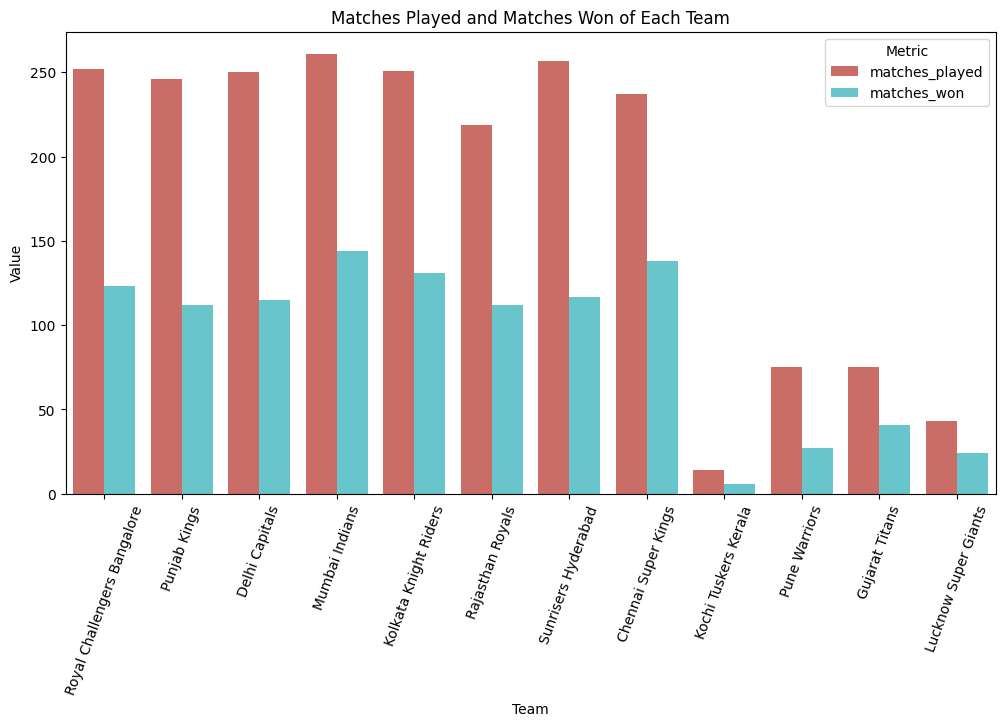

In [ ]:
# Plotting Matches Played & Winning Percentage
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['matches_played', 'matches_won'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='hls')
plt.title('Matches Played and Matches Won of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()

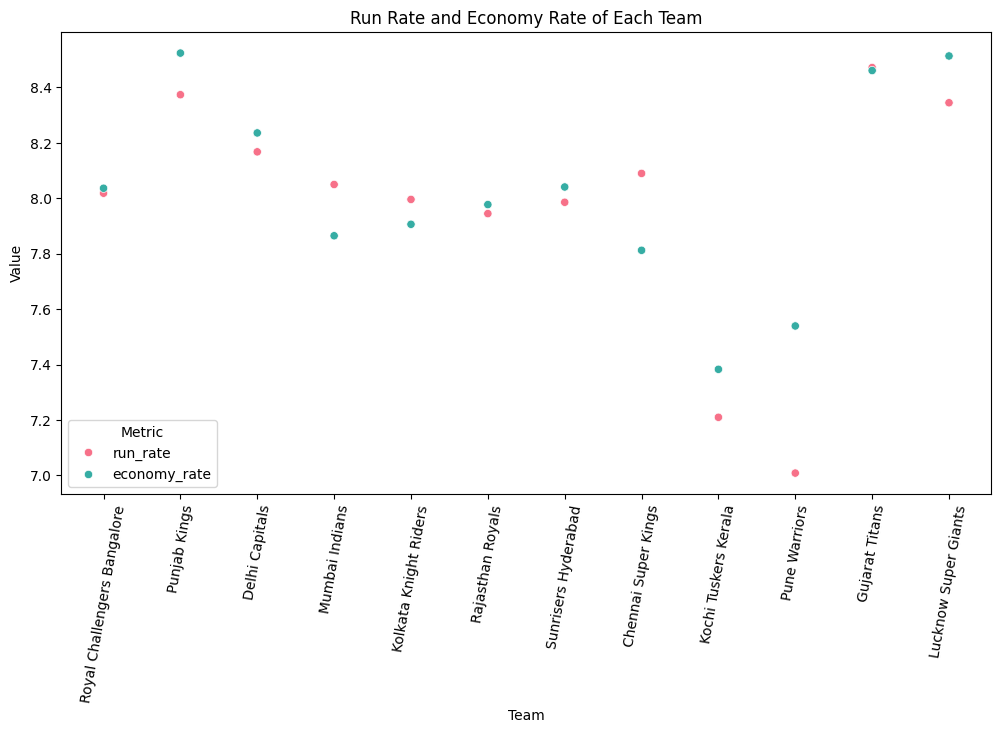

In [ ]:
# Plotting Run Rate & Economy Rate
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['run_rate', 'economy_rate'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='husl',markers="+")
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()

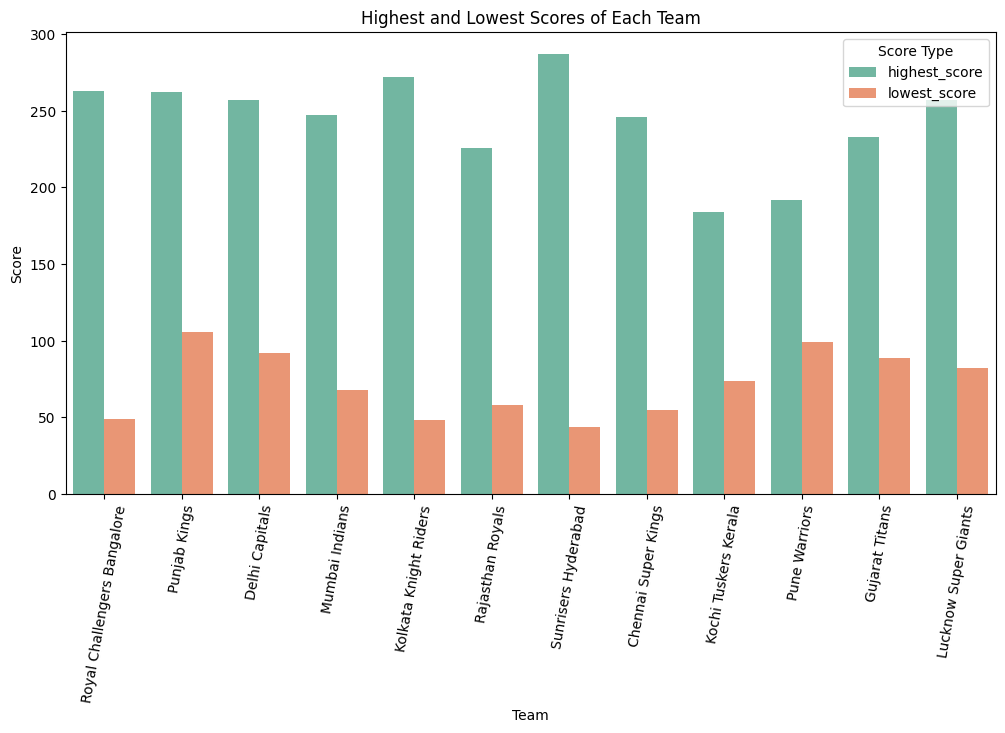

In [ ]:
# Plotting Highest and Lowest Scores
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['highest_score', 'lowest_score'],
                                    var_name='Score Type', value_name='Score')

sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette='Set2')
plt.title('Highest and Lowest Scores of Each Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=80)
plt.show()

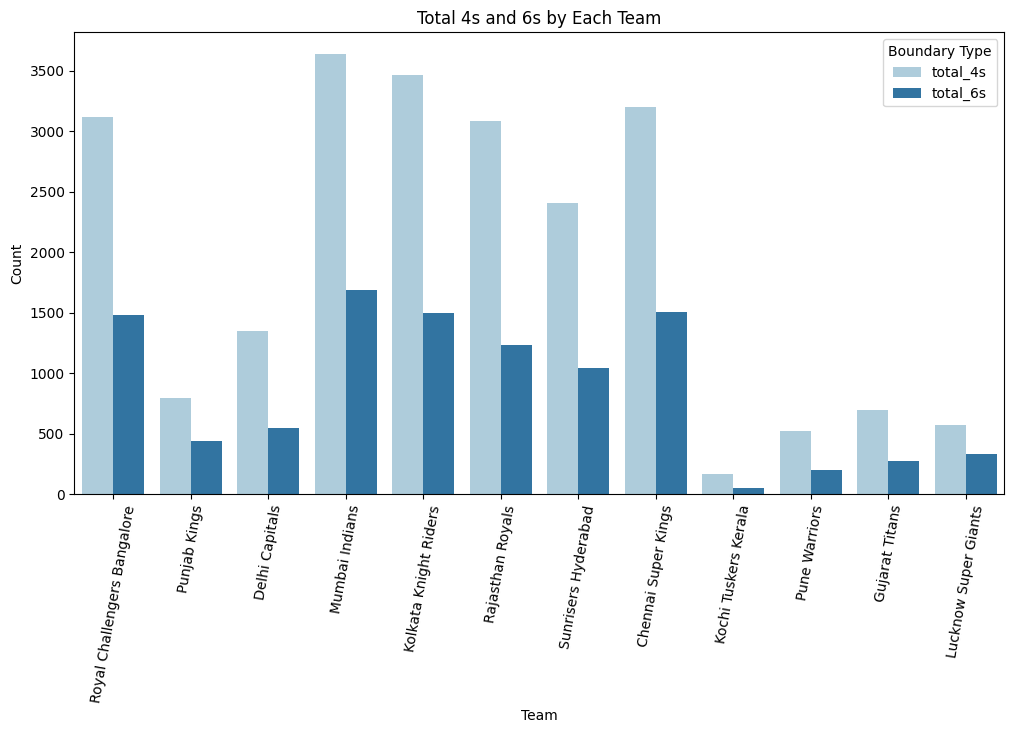

In [ ]:
# Plotting Total 4s and 6s
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['total_4s', 'total_6s'],
                                    var_name='Boundary Type', value_name='Count')
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='Paired')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

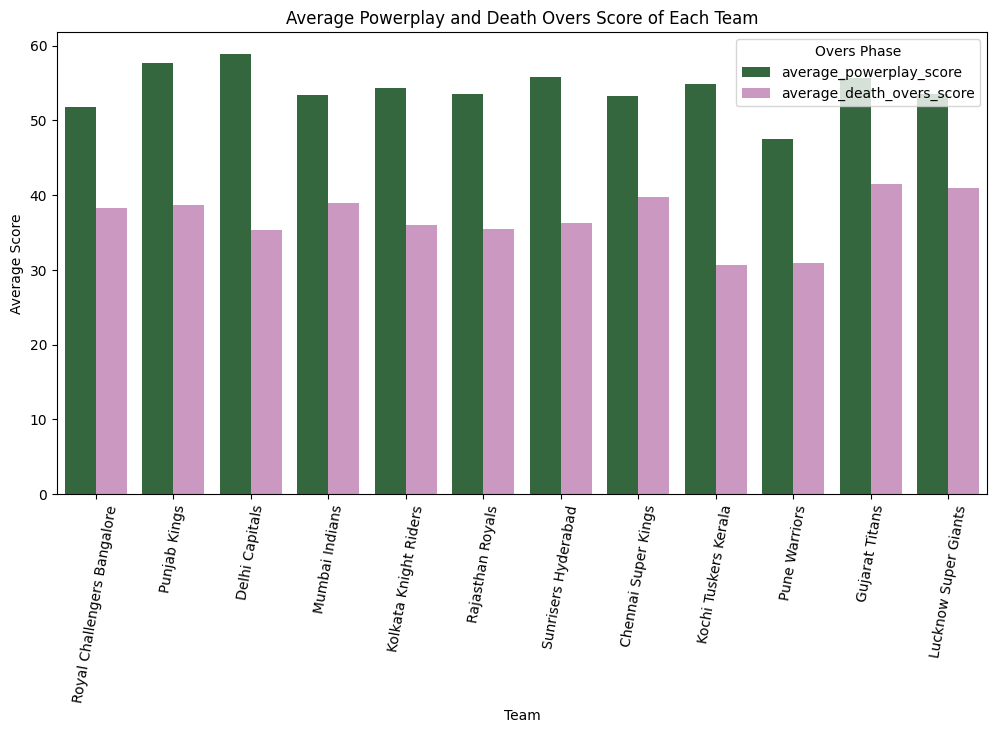

In [ ]:
# Plotting Average Powerplay and Death Overs Score
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['average_powerplay_score', 'average_death_overs_score'],
                                    var_name='Overs Phase', value_name='Average Score')
sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='cubehelix')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()

Player Performance



In [ ]:
#Player detailed
pd.set_option('display.max_rows', 10)

players


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Chopra,0.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,0.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0
A Dananjaya,0.0,5.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.00,80.00,25.0,0.0,4.0,47.0,11.75,inf,0.0,0.0
A Flintoff,0.0,57.0,2.0,62.0,24.0,23.0,2.0,1.0,5.0,2.0,...,31.00,108.77,66.0,2.0,11.0,105.0,9.55,33.00,4.0,0.0
A Kamboj,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.00,100.00,68.0,2.0,11.0,114.0,10.36,34.00,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,0.0,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,...,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00,3.0,0.0
Younis Khan,0.0,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,...,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0
Yudhvir Singh,0.0,16.0,2.0,22.0,8.0,4.0,1.0,0.0,1.0,2.0,...,5.50,137.50,74.0,4.0,12.0,122.0,10.17,18.50,0.0,0.0
Yuvraj Singh,0.0,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,...,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50,31.0,5.0


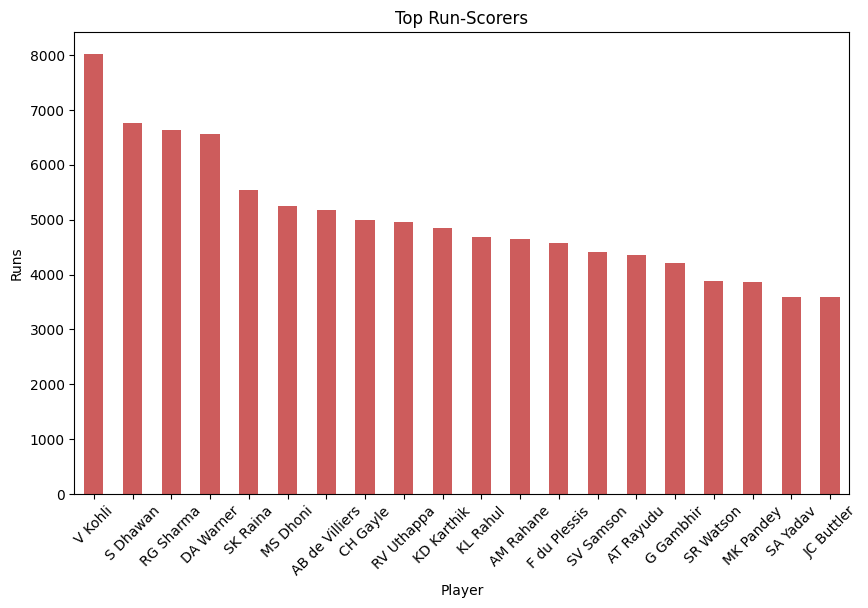

In [ ]:
# Plotting top run-scorers
plt.figure(figsize=(10, 6))
top_run_scorers = players['runs'].nlargest(20)
top_run_scorers.plot(kind='bar', color='#CD5C5C')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45)
plt.show()

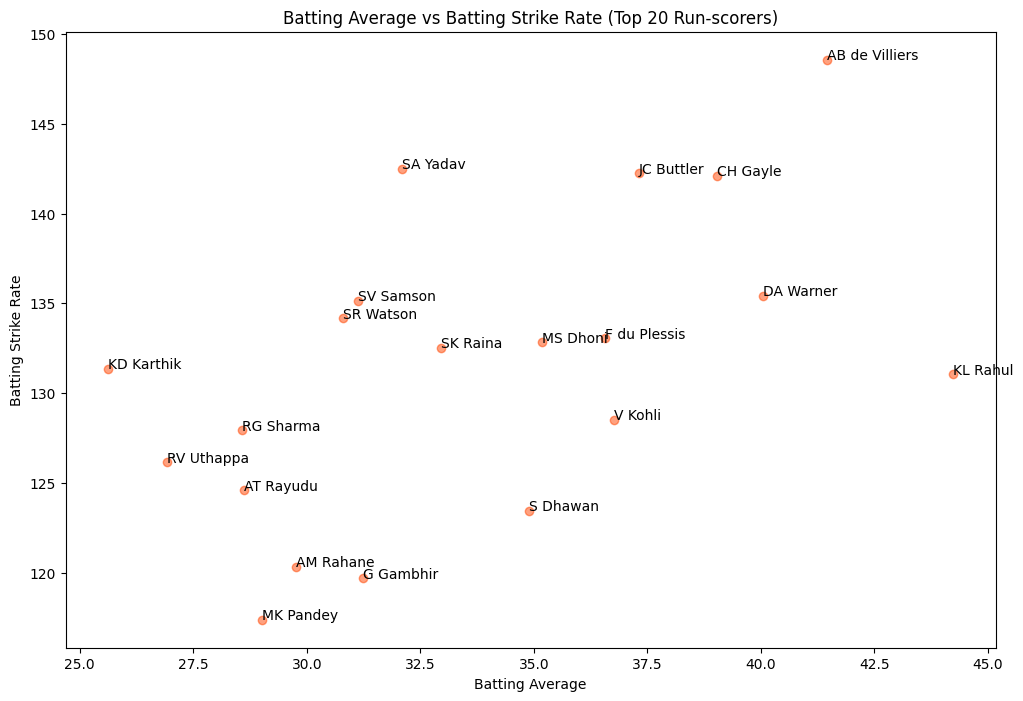

In [ ]:
# Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg'], top_run_scorers['batting_strike_rate'], color='#FF4500', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with the player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg'], player['batting_strike_rate']))

plt.show()

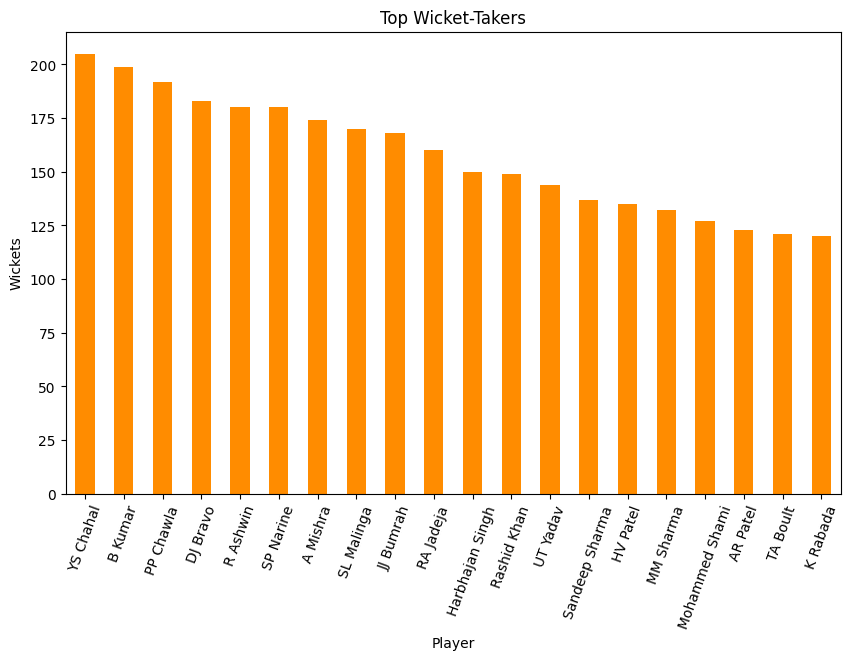

In [ ]:
# Plotting top wicket-takers
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='#FF8C00')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()

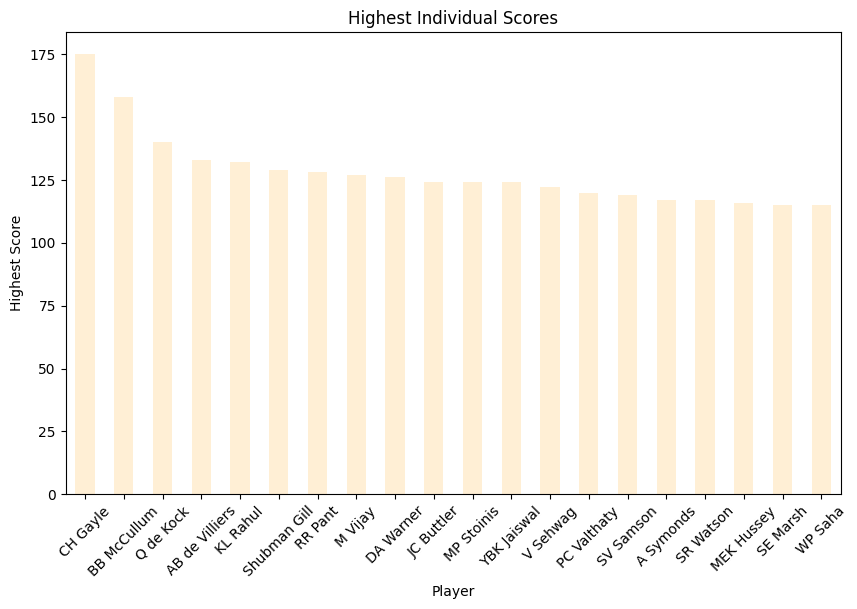

In [ ]:
# Plotting top highest individual scores
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='#FFEFD5')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

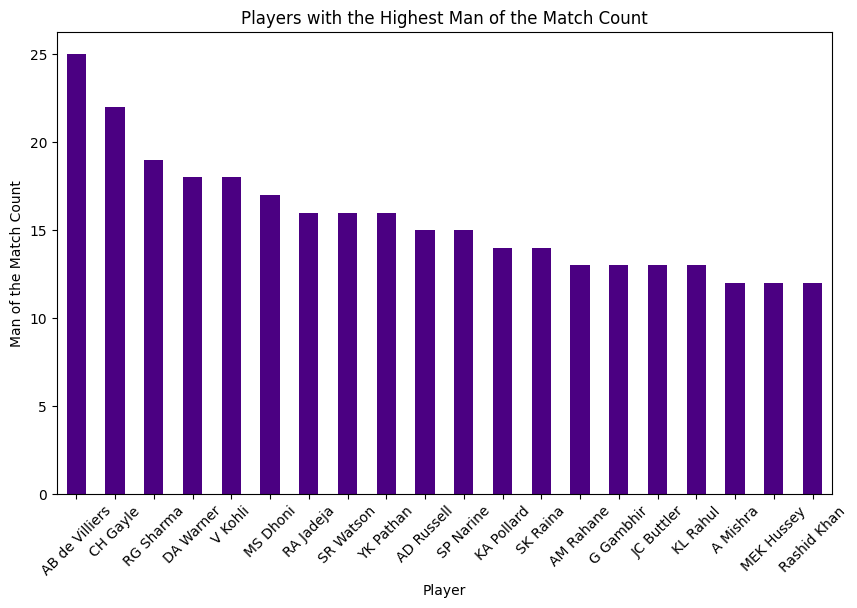

In [ ]:
# Man of the Match Count
plt.figure(figsize=(10, 6))
top_mom_players = players['man_of_the_match_count'].nlargest(20)
top_mom_players.plot(kind='bar', color='#4B0082')
plt.xlabel('Player')
plt.ylabel('Man of the Match Count')
plt.title('Players with the Highest Man of the Match Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-141-9a261c215c69>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_players.index, y = top_players, orient='v', palette="RdPu");


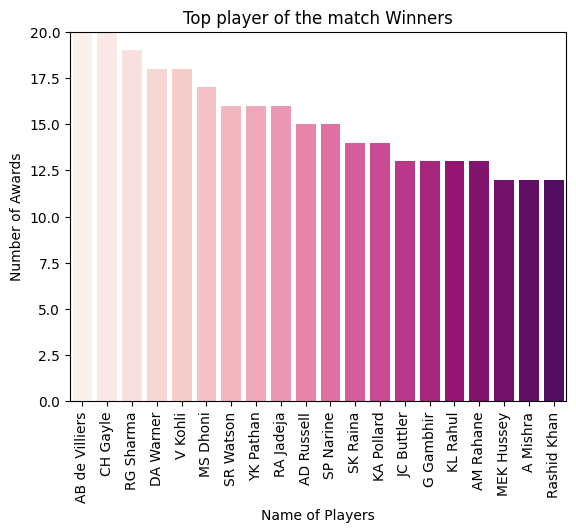

In [ ]:
top_players = matches.player_of_match.value_counts()[:20]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Number of Awards")
ax.set_xlabel("Name of Players")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="RdPu");
plt.xticks(rotation = 'vertical')
plt.show()

MACHINE LEARNING


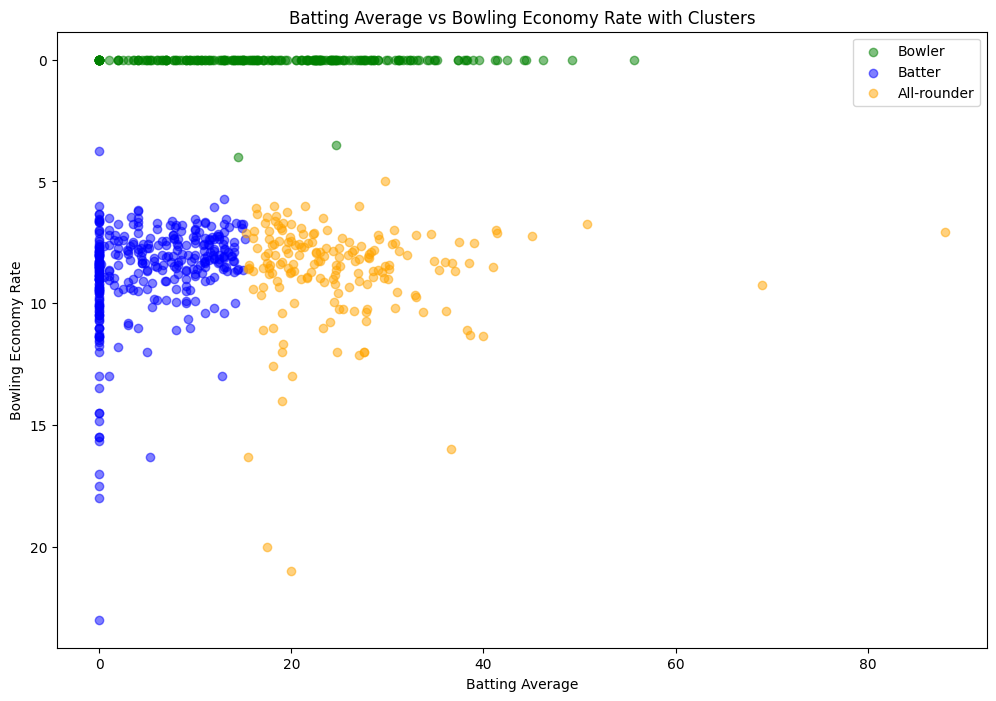

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Copy the DataFrame
players_copy = players.copy()

players_copy = players_copy[['bowling_econ', 'batting_avg']]

# Check for NaN or infinite values
players_copy = players_copy.replace([float('inf'), -float('inf')], pd.NA)  # Replace inf with NaN
players_copy = players_copy.dropna()  # Drop rows with NaN values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(players_copy)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster column to the copied DataFrame
players_copy['clusters'] = clusters

players = players.join(players_copy['clusters'], how='left', rsuffix='_cluster')

# Define cluster labels and colors
cluster_labels = {0: 'Batter', 1: 'Bowler', 2: 'All-rounder'}
colors = {'Batter': 'blue', 'Bowler': 'green', 'All-rounder': 'orange'}

# Map cluster labels to the clusters in the DataFrame
players['cluster'] = players['clusters'].map(cluster_labels)

# Check for NaN values in the 'cluster' column
# print(players['cluster'].isna().sum())

# Plotting Batting Average vs Bowling Economy Rate with clusters
plt.figure(figsize=(12, 8))

# Ensure no NaN values in 'cluster' column before plotting
players_no_nan = players.dropna(subset=['cluster'])

for cluster in players_no_nan['cluster'].unique():
    subset = players_no_nan[players_no_nan['cluster'] == cluster]
    plt.scatter(subset['batting_avg'], subset['bowling_econ'],
                color=colors[cluster], label=cluster, alpha=0.5)

plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.gca().invert_yaxis()  # Invert y-axis to show better economy rates higher up
plt.legend()
plt.show()

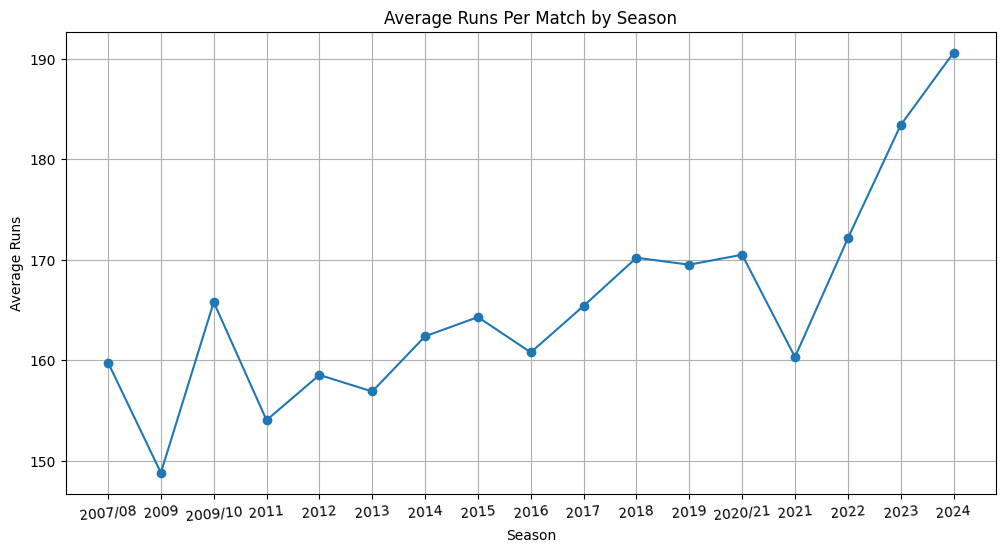

In [ ]:
# Calculate average runs per match per season
seasonal_runs = matches.groupby('season').agg({'target_runs': 'mean'}).reset_index()
seasonal_runs.columns = ['season', 'average_runs']

plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['season'], seasonal_runs['average_runs'], marker='o')
plt.title('Average Runs Per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(rotation=5)
plt.grid(True)
plt.show()

In [ ]:
deliveries = deliveries_df.copy()
matches = matches_df.copy()

In [ ]:
#Inning and total runs
inning_scores = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inning_scores = inning_scores[inning_scores['inning']==1]
pd.set_option('display.max_rows', 10)

inning_scores


,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [ ]:
#total runs and target
inning_scores['target'] = inning_scores['total_runs'] + 1
pd.set_option('display.max_rows', 10)

inning_scores

,match_id,inning,total_runs,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
...,...,...,...,...
2207,1426307,1,214,215
2209,1426309,1,159,160
2211,1426310,1,172,173
2213,1426311,1,175,176


In [ ]:
#Match id and full deatiled
matches.rename(columns={'id': 'match_id'}, inplace=True)
pd.set_option('display.max_rows', 10)
matches

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [ ]:
#match inning scores merge (target and match id)
matches = matches.merge(inning_scores[['match_id','target']], on='match_id')
pd.set_option('display.max_rows', 10)
matches

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,215
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,160
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,173
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,176


In [ ]:
#team names
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in team columns
matches[team_columns] = matches[team_columns].replace(team_name_mapping)


In [ ]:
# Teams that will play in 2025 season
teams_2025 = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
]

# Extracting only the selected teams
matches = matches[matches['team1'].isin(teams_2025)]
matches = matches[matches['team2'].isin(teams_2025)]
pd.set_option('display.max_rows', 10)
matches

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,215
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,160
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,173
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,176


In [ ]:
#matches city unique
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [ ]:
# Rplace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)

matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [ ]:
#matches is null sum deatiled
matches.isnull().sum()

,0
match_id,0
season,0
city,51
date,0
match_type,0
...,...
super_over,0
method,989
umpire1,0
umpire2,0


In [ ]:
# Extracting only selected columns
matches = matches[['match_id', 'season', 'city', 'team1', 'team2', 'winner', 'target']].dropna()
pd.set_option('display.max_rows', 10)
matches

,match_id,season,city,team1,team2,winner,target
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111
...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,215
1091,1426309,2024,Ahmedabad,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,160
1092,1426310,2024,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,173
1093,1426311,2024,Chennai,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,176


In [ ]:
matches.isnull().sum()

,0
match_id,0
season,0
city,0
team1,0
team2,0
winner,0
target,0


In [ ]:
# Replace the team names in the 'batting_team' column
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)

deliveries = deliveries[deliveries['batting_team'].isin(teams_2025)]
deliveries = deliveries[deliveries['bowling_team'].isin(teams_2025)]
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
# Merge to the final dataset
final = matches.merge(deliveries, on='match_id')
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
# Get only second inning matches
final = final[final['inning'] == 2]
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
# Add 'current_score'
final.loc[:, 'current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [ ]:
# Add 'runs_left'
final.loc[:, 'runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

# Add 'balls_left'
final.loc[:, 'balls_left'] = np.where(120 - final['over']*6 - final['ball']>=0, 120 - final['over']*6 - final['ball'], 0)
final.head()


# Add 'wickets_left'
final.loc[:, 'wickets_left'] = 10 - final.groupby('match_id')['is_wicket'].cumsum()
final.head()




,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,1,222,119,10
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,wides,0,NaN,NaN,NaN,2,221,118,10
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,0,NaN,NaN,NaN,2,221,117,10
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,3,220,116,10
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,4,219,115,10


In [ ]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0,
    (final['runs_left'] * 6) / final['balls_left'],
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,1,222,119,10,6.0,11.193277
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,2,221,118,10,6.0,11.237288
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,2,221,117,10,4.0,11.333333
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,3,220,116,10,4.5,11.379310
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,4,219,115,10,4.8,11.426087


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,1,222,119,10,6.0,11.193277,0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2,221,118,10,6.0,11.237288,0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2,221,117,10,4.0,11.333333,0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,3,220,116,10,4.5,11.379310,0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,4,219,115,10,4.8,11.426087,0


In [ ]:
winning_pred = final[['season', 'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target', 'result']]
winning_pred.head()
winning_pred['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [ ]:
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != '2024']

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)

Training set size: (101483, 9) (101483,)
Test set size: (8210, 9) (8210,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Column transformer
trf = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city']),
    ('num', StandardScaler(), ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target'])
], remainder='passthrough')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define the pipeline with the XGBoost classifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': randint(100, 301),  # Range [100, 300]
    'classifier__max_depth': randint(3, 10),        # Range [3, 9]
    'classifier__learning_rate': uniform(0.01, 0.19), # Range [0.01, 0.2]
    'classifier__subsample': uniform(0.5, 0.5),       # Range [0.5, 1.0]
    'classifier__colsample_bytree': uniform(0.3, 0.7) # Range [0.3, 1.0]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_1 = random_search.best_estimator_
best_params_1 = random_search.best_params_
best_score_1 = random_search.best_score_

# Print the results
print(f"Best parameters: {best_params_1}")
print(f"Best cross-validation score: {best_score_1}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'classifier__colsample_bytree': 0.46785115141018224, 'classifier__learning_rate': 0.027835925115445435, 'classifier__max_depth': 3, 'classifier__n_estimators': 216, 'classifier__subsample': 0.8191352969216752}
Best cross-validation score: 0.7677143507405373


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': randint(100, 301),  # Range [100, 300]
    'classifier__max_depth': randint(10, 31),       # Range [10, 30]
    'classifier__min_samples_split': randint(2, 11) # Range [2, 10]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_2 = random_search.best_estimator_
best_params_2 = random_search.best_params_
best_score_2 = random_search.best_score_

# Print the results
print(f"Best parameters: {best_params_2}")
print(f"Best cross-validation score: {best_score_2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 140}
Best cross-validation score: 0.7621569500757659


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a voting classifier combining these models
final_model = VotingClassifier(estimators=[
    ('xgb', best_model_1),
    ('rnd', best_model_2),
], voting='soft')

# Train the voting classifier on the train dataset
final_model.fit(X_train_23, y_train_23)

# Evaluate the performance on a test set
y_pred = final_model.predict(X_test_24)
print("Accuracy on test set:", accuracy_score(y_test_24, y_pred))

NameError: name 'best_model_2' is not defined

In [ ]:
final_model.predict(X_test_24)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = final_model.predict(X_test_24)

# Predict probabilities if needed
y_pred_proba = final_model.predict_proba(X_test_24)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_24, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred, average='weighted')
recall = recall_score(y_test_24, y_pred, average='weighted')
f1 = f1_score(y_test_24, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test_24, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.8138
Precision: 0.8200
Recall: 0.8138
F1 Score: 0.8120

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      4290
           1       0.86      0.73      0.79      3920

    accuracy                           0.81      8210
   macro avg       0.82      0.81      0.81      8210
weighted avg       0.82      0.81      0.81      8210



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Sample input
l = [['Chennai Super Kings', 'Royal Challengers Bangalore', 'Chennai', 124, 90, 1 ,9.8, 8.2, 173]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.67656833, 0.32343166]])

In [ ]:
# Sample input 1
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 96, 72, 0 ,12, 6.1, 171]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.40014445, 0.59985555]])

In [ ]:
# Sample input
l = [['Mumbai Indians', 'Chennai Super Kings', 'Mumbai',74,30, 3, 8.8, 14.8, 206]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.86126064, 0.13873936]])

In [ ]:
# Sample input
l = [['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Chennai', 30, 78, 1, 12, 2.3, 114]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.25572369, 0.74427631]])

In [ ]:
# Sample input
l = [['Punjab Kingss', 'Kolkata Knight Riders', 'Kolkata', 76, 48, 2, 2.5, 1.5, 261]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.57107897, 0.42892102]])

In [ ]:
# Sample input 1
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 48, 6 ,10, 6.5, 200]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.30173431, 0.69826569]])